#HIDS-506 Final Project: One-Hot-Encoding Chief Complaints

## Packages



We will start by loading some of the packages that will help us 
organize and visualize the data. Other packages will be loaded as necessary.

In [ ]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib 
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

## Dataset

**Research Question:** Can machine learning (ML) provide a data-driven alternative to current emergency care triage and produce an accurate patient acuity score based on minimal patient information upon admission to the Emergency Department (ED), thus reducing human-biased medical decisions and preserving clinician time, attention, and ED workflow? 

MIMIC-IV 2.2 Admissions Dataset
* **Subject ID:** Unique patient identification number (will be dropped from feature set; used to merge datasets)
* **language:** Spoken language of patient
* **ED Registration Time:** Time of patient registration in the ED (datetime)
* **ED Out-Time:** Time of patient discharge/transfer
* **Insurance:** Medicare, Medicaid, or Other

MIMIC-IV 2.2 Patients Dataset
* **Subject ID:** Unique patient identification number (will be dropped from feature set; used to merge datasets)
* **Anchor Age:** Age of patient during anchor year (years) (de-identified encoding)
* **Anchor Year:** Year range patient was seen in the ED (years) (de-identified encoding)



Exploring the datasets:

In [ ]:
#from google.colab import 
#drivedrive.mount('/content/drive')

In [ ]:
#mounting google drive to access files 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Triage_clean_df

In [ ]:
# triage clean file includes cleaned dataframe with all merged features from MIMIC-IV
# defining triage_clean_file path 
triage_clean_file = '/content/drive/MyDrive/HIDS_506_FinalProject/data/triage_clean.csv'

# read in triage_clean_file to dataframe
triage_clean_df = pd.read_csv(triage_clean_file)

In [ ]:
# visualizing the first few rows of triage_clean_df.csv
triage_clean_df.head()

Unnamed: 0  subject_id  temperature  heartrate  resprate  o2sat   sbp  \
0           0    10000032         97.8       87.0      14.0   97.0  71.0   
1           1    10000032         97.8       87.0      14.0   97.0  71.0   
2           2    10000032         97.8       87.0      14.0   97.0  71.0   
3           3    10000032         97.8       87.0      14.0   97.0  71.0   
4           4    10000032         97.8       87.0      14.0   97.0  71.0   

    dbp  pain  acuity  ... disposition_ELOPED disposition_EXPIRED  \
0  43.0     7     2.0  ...                  0                   0   
1  43.0     7     2.0  ...                  0                   0   
2  43.0     7     2.0  ...                  0                   0   
3  43.0     7     2.0  ...                  0                   0   
4  43.0     7     2.0  ...                  0                   0   

  disposition_HOME  disposition_LEFT AGAINST MEDICAL ADVICE  \
0                0                                        0   
1                0                                        0   
2                0                                        0   
3                1                                        0   
4                0                                        0   

   disposition_LEFT WITHOUT BEING SEEN  disposition_OTHER  \
0                                    0                  0   
1                                    0                  0   
2                                    0                  0   
3                                    0                  0   
4                                    0                  0   

   disposition_TRANSFER  age_category_middle_adult  age_category_senior  \
0                     0                          1                    0   
1                     0                          1                    0   
2                     0                          1                    0   
3                     0                          1                    0   
4                     0                          1                    0   

   age_category_young_adult  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 40 columns]

In [ ]:
triage_clean_df.columns

Index(['Unnamed: 0', 'subject_id', 'temperature', 'heartrate', 'resprate',
       'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint', 'intime',
       'outtime', 'gender', 'deceased', 'race_AMERICAN INDIAN/ALASKA NATIVE',
       'race_ASIAN', 'race_BLACK/AFRICAN AMERICAN', 'race_HISPANIC/LATINO',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER/UNKNOWN',
       'race_PORTUGUESE', 'race_SOUTH AMERICAN', 'race_WHITE',
       'arrival_transport_AMBULANCE', 'arrival_transport_HELICOPTER',
       'arrival_transport_OTHER', 'arrival_transport_UNKNOWN',
       'arrival_transport_WALK IN', 'disposition_ADMITTED',
       'disposition_ELOPED', 'disposition_EXPIRED', 'disposition_HOME',
       'disposition_LEFT AGAINST MEDICAL ADVICE',
       'disposition_LEFT WITHOUT BEING SEEN', 'disposition_OTHER',
       'disposition_TRANSFER', 'age_category_middle_adult',
       'age_category_senior', 'age_category_young_adult'],
      dtype='object')

In [ ]:
# redefining dataframe columns
triage_clean_df = triage_clean_df[['subject_id', 'temperature', 'heartrate', 'resprate',
       'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint', 'intime',
       'outtime', 'gender', 'deceased', 'race_AMERICAN INDIAN/ALASKA NATIVE',
       'race_ASIAN', 'race_BLACK/AFRICAN AMERICAN', 'race_HISPANIC/LATINO',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER/UNKNOWN',
       'race_PORTUGUESE', 'race_SOUTH AMERICAN', 'race_WHITE',
       'arrival_transport_AMBULANCE', 'arrival_transport_HELICOPTER',
       'arrival_transport_OTHER', 'arrival_transport_UNKNOWN',
       'arrival_transport_WALK IN', 'disposition_ADMITTED',
       'disposition_ELOPED', 'disposition_EXPIRED', 'disposition_HOME',
       'disposition_LEFT AGAINST MEDICAL ADVICE',
       'disposition_LEFT WITHOUT BEING SEEN', 'disposition_OTHER',
       'disposition_TRANSFER', 'age_category_middle_adult',
       'age_category_senior', 'age_category_young_adult']]

In [ ]:
triage_clean_df.head()

subject_id  temperature  heartrate  resprate  o2sat   sbp   dbp  pain  \
0    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
1    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
2    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
3    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
4    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   

   acuity chiefcomplaint  ... disposition_ELOPED disposition_EXPIRED  \
0     2.0    hypotension  ...                  0                   0   
1     2.0    hypotension  ...                  0                   0   
2     2.0    hypotension  ...                  0                   0   
3     2.0    hypotension  ...                  0                   0   
4     2.0    hypotension  ...                  0                   0   

   disposition_HOME  disposition_LEFT AGAINST MEDICAL ADVICE  \
0                 0                                        0   
1                 0                                        0   
2                 0                                        0   
3                 1                                        0   
4                 0                                        0   

   disposition_LEFT WITHOUT BEING SEEN  disposition_OTHER  \
0                                    0                  0   
1                                    0                  0   
2                                    0                  0   
3                                    0                  0   
4                                    0                  0   

   disposition_TRANSFER  age_category_middle_adult  age_category_senior  \
0                     0                          1                    0   
1                     0                          1                    0   
2                     0                          1                    0   
3                     0                          1                    0   
4                     0                          1                    0   

   age_category_young_adult  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 39 columns]

In [ ]:
# (2984649 observations, 39 features)
triage_clean_df.shape

(2984649, 39)

### Undersampling patient acuity scores

In [ ]:
# visualizing patient acuity score counts
triage_clean_df['acuity'].value_counts()

3.0    1776350
2.0     930618
4.0     181285
1.0      87155
5.0       9241
Name: acuity, dtype: int64

3.0    1776350
2.0     930618
4.0     181285
1.0      87155
5.0       9241
Name: acuity, dtype: int64


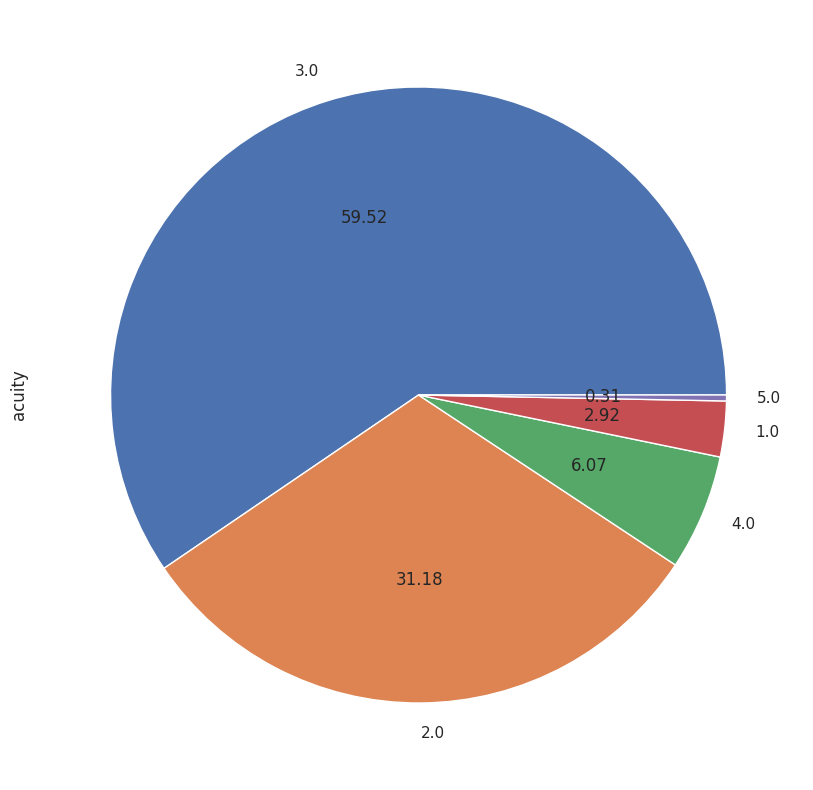

In [ ]:
# visualizing patient acuity score counts via pie chart to see distribution of data 
triage_clean_df['acuity'].value_counts().plot.pie(autopct = '%.2f')
print(triage_clean_df['acuity'].value_counts())

In [ ]:
triage_clean_df.shape

(2984649, 39)

In [ ]:
# Imports for resampling and rescaling patinet acuity feature column
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 6.8 MB/s eta 0:00:00


In [ ]:
# converting patient acuity column to data type integer
triage_clean_df['acuity'] = triage_clean_df['acuity'].astype(int)

In [ ]:
# defining new split of dataframe to hold features (X_df) and outcome (y_df)
X_df = triage_clean_df.drop(columns=['acuity'])
y_df = triage_clean_df['acuity']

In [ ]:
# visualizing y_df
y_df.head()

0    2
1    2
2    2
3    2
4    2
Name: acuity, dtype: int64

In [ ]:
# visualizing X_df
X_df.head()

subject_id  temperature  heartrate  resprate  o2sat   sbp   dbp  pain  \
0    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
1    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
2    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
3    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   
4    10000032         97.8       87.0      14.0   97.0  71.0  43.0     7   

  chiefcomplaint               intime  ... disposition_ELOPED  \
0    hypotension  2180-05-06 19:17:00  ...                  0   
1    hypotension  2180-06-26 15:54:00  ...                  0   
2    hypotension  2180-08-05 20:58:00  ...                  0   
3    hypotension  2180-07-22 16:24:00  ...                  0   
4    hypotension  2180-07-23 05:54:00  ...                  0   

   disposition_EXPIRED  disposition_HOME  \
0                    0                 0   
1                    0                 0   
2                    0                 0   
3                    0                 1   
4                    0                 0   

   disposition_LEFT AGAINST MEDICAL ADVICE  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   disposition_LEFT WITHOUT BEING SEEN  disposition_OTHER  \
0                                    0                  0   
1                                    0                  0   
2                                    0                  0   
3                                    0                  0   
4                                    0                  0   

   disposition_TRANSFER  age_category_middle_adult  age_category_senior  \
0                     0                          1                    0   
1                     0                          1                    0   
2                     0                          1                    0   
3                     0                          1                    0   
4                     0                          1                    0   

   age_category_young_adult  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 38 columns]

In [ ]:
# Import undersampling method from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Defining the target label
target_labels = ['1','2', '3', '4', '5']
#['1.0', '2.0', '3.0', '4.0', '5.0']
#['acuity']


# Defining the desired label frequencies
desired_frequencies = [150000, 150000, 1000000, 50000, 10000]
#desired_frequencies = [int(freq) for freq in desired_frequencies]

# computing the majority class label frequency
majority_class_frequency = max(desired_frequencies)

# compute the ratio of majority class to minority class
ratio = {label: int(majority_class_frequency / freq) for label, freq in zip(target_labels, desired_frequencies)}

# define the undersampling strategy
undersampler = RandomUnderSampler(sampling_strategy={'1': 10000, '2': 10000, '3': 15000, '4': 15000, '5': 9241}, random_state=42)
y_df = y_df.astype(str)

# applying the undersampling strategy
X_resampled, y_resampled = undersampler.fit_resample(X_df, y_df)

# concatenate the resampled features and labels into a new dataframe
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)


In [ ]:
# save the DataFrame to a CSV file
resampled_df.to_csv('resampled_df2.csv', index=False)

3    15000
4    15000
1    10000
2    10000
5     9241
Name: acuity, dtype: int64


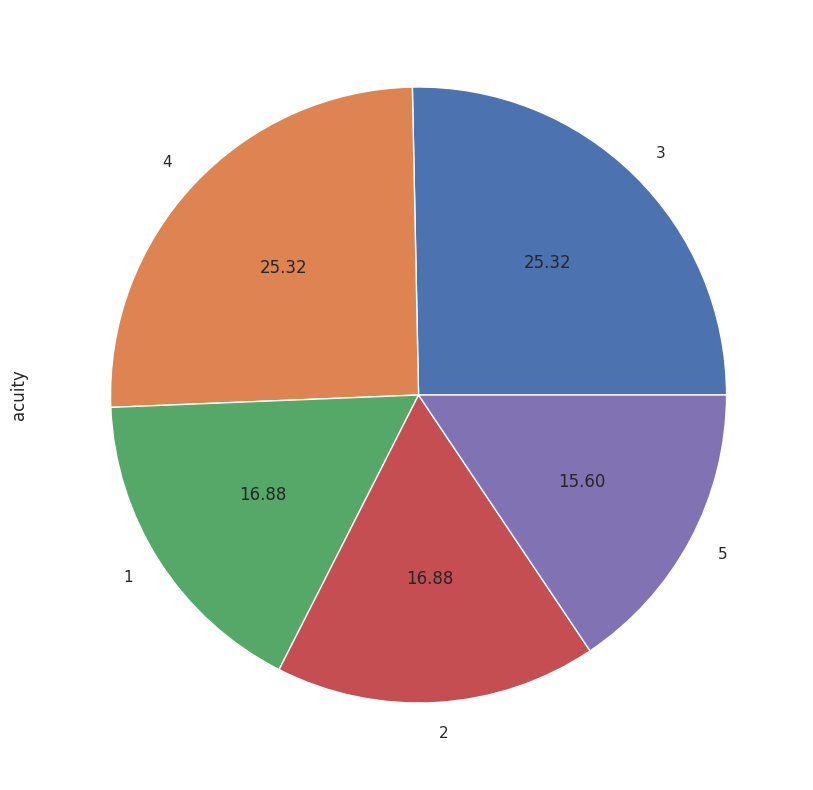

In [ ]:
# visualizing patient acuity resampling 
resampled_df['acuity'].value_counts().plot.pie(autopct = '%.2f')
print(resampled_df['acuity'].value_counts())

In [ ]:
# redefine split from resampled and concatenated dataframe so that X_df is features and y_df hold only patient acuity (outcome)
X_df = resampled_df.drop(columns=['acuity'])
y_df = resampled_df['acuity']

In [ ]:
# one-hot-encoding the outcome dataframe for multi-class classification
y_df = pd.get_dummies(y_df)

In [ ]:
#(59241 observations, 5 class labels)
y_df.shape

(59241, 5)

In [ ]:
# visualizing y_df
y_df.head()

1  2  3  4  5
0  1  0  0  0  0
1  1  0  0  0  0
2  1  0  0  0  0
3  1  0  0  0  0
4  1  0  0  0  0

### One-hot-encoding Chief Complaint

In [ ]:
# one-hot-encoding chiefcomplaint in X_df by defining a new dataframe to hold cheif complaint dummies
dummies = X_df['chiefcomplaint'].str.get_dummies(sep=",")

In [ ]:
# concatenating original X_df and one-hot-encoded cheif complaints 
df_merged = pd.concat([X_df, dummies], axis=1)

In [ ]:
# drop the original column used to create dummy variables
df_merged.drop(['chiefcomplaint'], axis=1, inplace=True)

In [ ]:
# Save resampled/one-hot-encoded X_df to csv
df_merged.to_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/df_merged_resampled.csv', index=False)

In [ ]:
# Save resampled y_df to csv
y_df.to_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/y_df2_resampled.csv', index=False)